In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Step 1: Load the Data

In [3]:
File_Path = "Sales_Data_Project.csv"

In [4]:
Data  = pd.read_csv(File_Path)

In [6]:
#1.1: investigate the data
print(Data.info())
print(Data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Product        365 non-null    object 
 2   Region         365 non-null    object 
 3   Units Sold     365 non-null    int64  
 4   Unit Price     365 non-null    float64
 5   Revenue        365 non-null    float64
 6   Profit Margin  365 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 20.1+ KB
None
         Date    Product Region  Units Sold  Unit Price   Revenue  \
0  2023-01-01  Product A  North         238       41.10  24219.98   
1  2023-01-02  Product B  South         147       47.03  22963.22   
2  2023-01-03  Product C   East         180       61.37  16858.78   
3  2023-01-04  Product D   West          46       61.70   9449.33   
4  2023-01-05  Product A  North         271       55.71  20652.06   

   Profit Margin 

# Step 2: Data Cleaning and Preparation

In [7]:
#2.1: Check for Missing Values
print(Data.isnull().sum())

Date             0
Product          0
Region           0
Units Sold       0
Unit Price       0
Revenue          0
Profit Margin    0
dtype: int64


In [12]:
#2.2: Check for Duplicates:
print(Data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
360    False
361    False
362    False
363    False
364    False
Length: 365, dtype: bool


In [13]:
print(Data.dtypes)
print(Data.info())

Date             datetime64[ns]
Product                  object
Region                   object
Units Sold                int64
Unit Price              float64
Revenue                 float64
Profit Margin           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Product        365 non-null    object        
 2   Region         365 non-null    object        
 3   Units Sold     365 non-null    int64         
 4   Unit Price     365 non-null    float64       
 5   Revenue        365 non-null    float64       
 6   Profit Margin  365 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 20.1+ KB
None


In [15]:
#2.4: Create a New Column for Total Profit= Profit Margin * Revenue
Data['Total Profit'] = Data['Revenue'] * Data['Profit Margin'] 
print(Data.info())
print(Data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Product        365 non-null    object        
 2   Region         365 non-null    object        
 3   Units Sold     365 non-null    int64         
 4   Unit Price     365 non-null    float64       
 5   Revenue        365 non-null    float64       
 6   Profit Margin  365 non-null    float64       
 7   Total Profit   365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 22.9+ KB
None
        Date    Product Region  Units Sold  Unit Price   Revenue  \
0 2023-01-01  Product A  North         238       41.10  24219.98   
1 2023-01-02  Product B  South         147       47.03  22963.22   
2 2023-01-03  Product C   East         180       61.37  16858.78   
3 2023-01-04  Product D   W

# Step 3: Exploratory Data Analysis (EDA)

In [16]:
#3.1: Descriptive Statistics
print(Data.describe())

       Units Sold  Unit Price       Revenue  Profit Margin  Total Profit
count  365.000000  365.000000    365.000000     365.000000    365.000000
mean   155.200000   49.865425  19330.862795       0.298548   5770.248498
std     90.291354   10.038405   4917.920425       0.050501   1779.573538
min      2.000000   23.800000   6411.170000       0.150000   1894.720800
25%     87.000000   42.930000  16118.120000       0.260000   4534.384000
50%    146.000000   49.640000  19492.860000       0.300000   5600.134900
75%    215.000000   57.460000  22784.830000       0.330000   6786.335400
max    420.000000   77.410000  30824.960000       0.430000  10788.736000


In [17]:
#IQR Function

In [18]:
def IQR_Calculate(DataFrame, Column):
    Q1 = DataFrame[Column].quantile(0.25)
    Q3 = DataFrame[Column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = DataFrame[(DataFrame[Column] < lower_bound) | (DataFrame[Column] > upper_bound)]
    filtered_data = DataFrame[(DataFrame[Column] >= lower_bound) & (DataFrame[Column] <= upper_bound)]

    return outliers, filtered_data

In [19]:
#visualization of the data

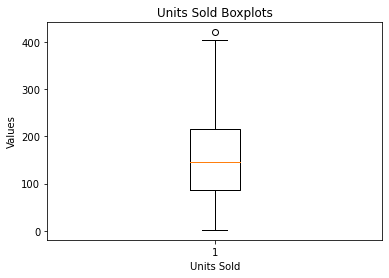

In [25]:
plt.boxplot(Data['Units Sold'])
plt.title("Units Sold Boxplots")
plt.xlabel("Units Sold")
plt.ylabel("Values")
plt.show()

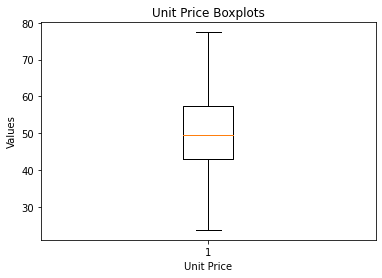

In [26]:
plt.boxplot(Data['Unit Price'])
plt.title("Unit Price Boxplots")
plt.xlabel("Unit Price")
plt.ylabel("Values")
plt.show()

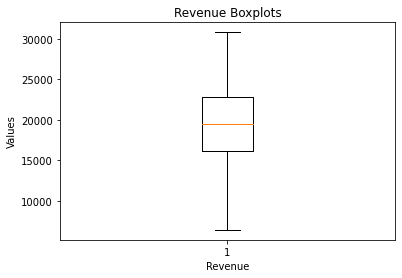

In [27]:
plt.boxplot(Data['Revenue'])
plt.title("Revenue Boxplots")
plt.xlabel("Revenue")
plt.ylabel("Values")
plt.show()

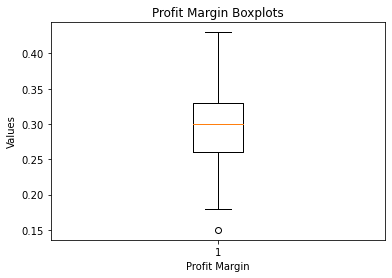

In [28]:
plt.boxplot(Data['Profit Margin'])
plt.title("Profit Margin Boxplots")
plt.xlabel("Profit Margin")
plt.ylabel("Values")
plt.show()


outlier detected

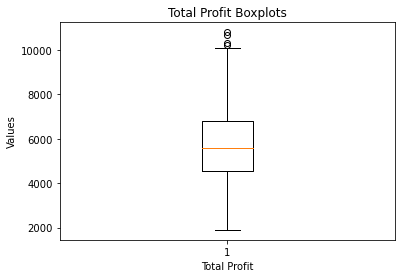

In [29]:
plt.boxplot(Data['Total Profit'])
plt.title("Total Profit Boxplots")
plt.xlabel("Total Profit")
plt.ylabel("Values")
plt.show()

outlier detected

# Find out the outliers

In [30]:
print('Units Sold')
print(IQR_Calculate(Data,'Units Sold'))

Units Sold
(         Date    Product Region  Units Sold  Unit Price   Revenue  \
35 2023-02-05  Product D   West         420       62.37  19984.13   

    Profit Margin  Total Profit  
35           0.26     5195.8738  ,           Date    Product Region  Units Sold  Unit Price   Revenue  \
0   2023-01-01  Product A  North         238       41.10  24219.98   
1   2023-01-02  Product B  South         147       47.03  22963.22   
2   2023-01-03  Product C   East         180       61.37  16858.78   
3   2023-01-04  Product D   West          46       61.70   9449.33   
4   2023-01-05  Product A  North         271       55.71  20652.06   
..         ...        ...    ...         ...         ...       ...   
360 2023-12-27  Product A  North          75       46.52  19580.24   
361 2023-12-28  Product B  South         169       40.56   8609.43   
362 2023-12-29  Product C   East         167       45.07  25579.10   
363 2023-12-30  Product D   West         179       36.94  25829.30   
364 2023-1

In [31]:
print('Units Price')
print(IQR_Calculate(Data,'Unit Price'))

Units Price
(Empty DataFrame
Columns: [Date, Product, Region, Units Sold, Unit Price, Revenue, Profit Margin, Total Profit]
Index: [],           Date    Product Region  Units Sold  Unit Price   Revenue  \
0   2023-01-01  Product A  North         238       41.10  24219.98   
1   2023-01-02  Product B  South         147       47.03  22963.22   
2   2023-01-03  Product C   East         180       61.37  16858.78   
3   2023-01-04  Product D   West          46       61.70   9449.33   
4   2023-01-05  Product A  North         271       55.71  20652.06   
..         ...        ...    ...         ...         ...       ...   
360 2023-12-27  Product A  North          75       46.52  19580.24   
361 2023-12-28  Product B  South         169       40.56   8609.43   
362 2023-12-29  Product C   East         167       45.07  25579.10   
363 2023-12-30  Product D   West         179       36.94  25829.30   
364 2023-12-31  Product A  North         112       43.08  20165.86   

     Profit Margin  Tota

In [32]:
print('Revenue')
print(IQR_Calculate(Data,'Revenue'))

Revenue
(Empty DataFrame
Columns: [Date, Product, Region, Units Sold, Unit Price, Revenue, Profit Margin, Total Profit]
Index: [],           Date    Product Region  Units Sold  Unit Price   Revenue  \
0   2023-01-01  Product A  North         238       41.10  24219.98   
1   2023-01-02  Product B  South         147       47.03  22963.22   
2   2023-01-03  Product C   East         180       61.37  16858.78   
3   2023-01-04  Product D   West          46       61.70   9449.33   
4   2023-01-05  Product A  North         271       55.71  20652.06   
..         ...        ...    ...         ...         ...       ...   
360 2023-12-27  Product A  North          75       46.52  19580.24   
361 2023-12-28  Product B  South         169       40.56   8609.43   
362 2023-12-29  Product C   East         167       45.07  25579.10   
363 2023-12-30  Product D   West         179       36.94  25829.30   
364 2023-12-31  Product A  North         112       43.08  20165.86   

     Profit Margin  Total Pr

In [33]:
print('Profit Margin')
print(IQR_Calculate(Data,'Profit Margin'))

Profit Margin
(          Date    Product Region  Units Sold  Unit Price   Revenue  \
299 2023-10-27  Product D   West         197       40.67  21730.38   

     Profit Margin  Total Profit  
299           0.15      3259.557  ,           Date    Product Region  Units Sold  Unit Price   Revenue  \
0   2023-01-01  Product A  North         238       41.10  24219.98   
1   2023-01-02  Product B  South         147       47.03  22963.22   
2   2023-01-03  Product C   East         180       61.37  16858.78   
3   2023-01-04  Product D   West          46       61.70   9449.33   
4   2023-01-05  Product A  North         271       55.71  20652.06   
..         ...        ...    ...         ...         ...       ...   
360 2023-12-27  Product A  North          75       46.52  19580.24   
361 2023-12-28  Product B  South         169       40.56   8609.43   
362 2023-12-29  Product C   East         167       45.07  25579.10   
363 2023-12-30  Product D   West         179       36.94  25829.30   
364

In [35]:
print('Total Profit')
print(IQR_Calculate(Data,'Total Profit'))

Total Profit
(          Date    Product Region  Units Sold  Unit Price   Revenue  \
57  2023-02-27  Product B  South         101       29.85  30824.96   
62  2023-03-04  Product C   East         173       48.34  28389.91   
294 2023-10-22  Product C   East          96       41.66  24800.68   
297 2023-10-25  Product B  South         145       53.02  28585.11   

     Profit Margin  Total Profit  
57            0.35    10788.7360  
62            0.36    10220.3676  
294           0.43    10664.2924  
297           0.36    10290.6396  ,           Date    Product Region  Units Sold  Unit Price   Revenue  \
0   2023-01-01  Product A  North         238       41.10  24219.98   
1   2023-01-02  Product B  South         147       47.03  22963.22   
2   2023-01-03  Product C   East         180       61.37  16858.78   
3   2023-01-04  Product D   West          46       61.70   9449.33   
4   2023-01-05  Product A  North         271       55.71  20652.06   
..         ...        ...    ...       

we filtered the data and get the outliers

Trend Analysis:

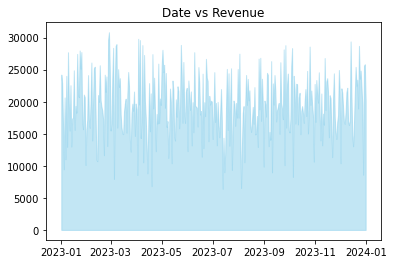

In [36]:
plt.fill_between(Data['Date'], Data['Revenue'], color='skyblue', alpha=0.5)
plt.title("Date vs Revenue")
plt.show()

2023-3 is the highest rate in revenue

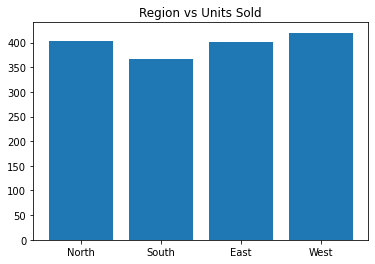

In [37]:
plt.bar(Data['Region'],Data['Units Sold'])
plt.title("Region vs Units Sold")
plt.show()

West is the highest region in units Sold

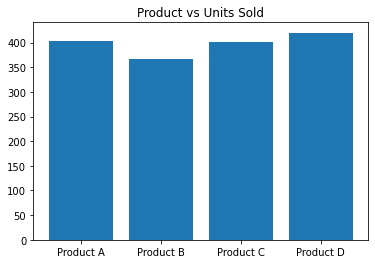

In [38]:
#3.3: Top Products:
plt.bar(Data['Product'],Data['Units Sold'])
plt.title("Product vs Units Sold")
plt.show()

Product D is the highest Product Sold

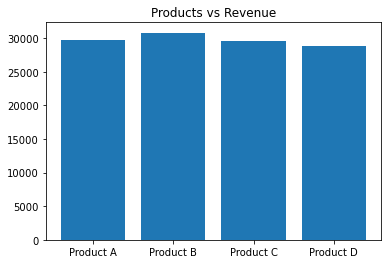

In [39]:
plt.bar(Data['Product'],Data['Revenue'])
plt.title("Products vs Revenue")
plt.show()

Product B is the highest Revenue Rate in Products

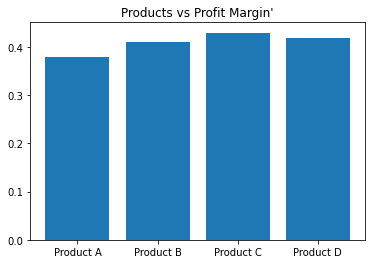

In [40]:
#3.3: Top Products
plt.bar(Data['Product'],Data['Profit Margin'])
plt.title("Products vs Profit Margin'")
plt.show()

Product C is the highest Profit Margin Rate in Products

In [41]:
Products_group = Data.groupby('Product').agg(
    total_revenue =('Revenue', 'sum'),
    total_Units =('Units Sold', 'sum')).reset_index()
print(Products_group)

     Product  total_revenue  total_Units
0  Product A     1779303.22        13985
1  Product B     1759298.31        14693
2  Product C     1773878.40        14730
3  Product D     1743284.99        13240


*Key Insights:*

    Highest Revenue: Product A, but most units sold: Product C.
    Lowest Performance: Product D in both revenue and units sold.
    Relatively Balanced Revenues: All products have similar revenue figures, differing by less than 40,000 between highest and lowest.

In [42]:
#3.4:Region Analysis
result = Data.groupby('Region').agg(
    Avg_ProfitMargin=('Profit Margin', 'mean'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()
print(result)

  Region  Avg_ProfitMargin  Total_Revenue
0   East          0.301978     1773878.40
1  North          0.301848     1779303.22
2  South          0.297912     1759298.31
3   West          0.292418     1743284.99


In [45]:
region_revenue = Data.groupby('Region')['Revenue'].sum().reset_index()
print(region_revenue)

  Region     Revenue
0   East  1773878.40
1  North  1779303.22
2  South  1759298.31
3   West  1743284.99


*Key Insights:*

    Most Profitable Region: East, with the highest profit margin.
    Top Revenue Generator: North, despite having the second-highest profit margin.
    Consistent Trend: Regions with higher average profit margins tend to have higher total revenues, except for East, which is outperformed by North in total revenue despite a slightly better margin.
    Least Performance: West, ranking lowest in both profit margin and total revenue.

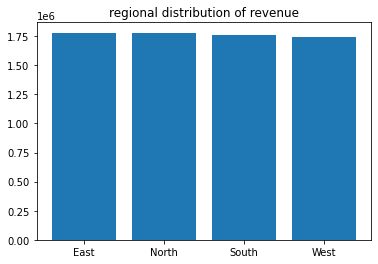

In [46]:
#3.5: Correlation Analysis
plt.bar(region_revenue['Region'],region_revenue['Revenue'])
plt.title("regional distribution of revenue")
plt.show()

               Units Sold  Unit Price   Revenue  Profit Margin  Total Profit
Units Sold       1.000000    0.023237  0.082308       0.060771      0.092672
Unit Price       0.023237    1.000000 -0.049350      -0.049169     -0.048416
Revenue          0.082308   -0.049350  1.000000      -0.003799      0.826222
Profit Margin    0.060771   -0.049169 -0.003799       1.000000      0.541359
Total Profit     0.092672   -0.048416  0.826222       0.541359      1.000000


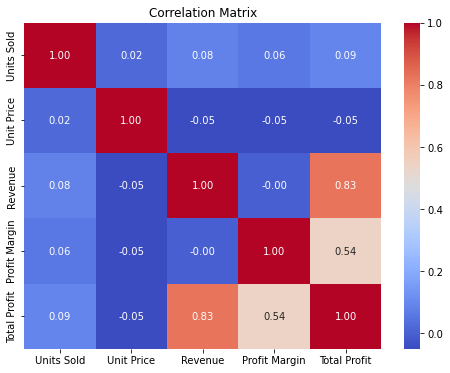

In [47]:
correlation_matrix = Data.corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*Key Observations:*

    Units Sold:
        Weak positive correlation with Revenue (0.082) and Total Profit (0.093), suggesting that higher units sold may slightly contribute to increased revenue and profit.
        Negligible correlation with Unit Price (0.023) and Profit Margin (0.061).

    Unit Price:
        Negative correlation with Revenue (-0.049) and Total Profit (-0.048), indicating that higher unit prices might slightly decrease revenue and profit.
        Very weak negative correlation with Profit Margin (-0.049) and negligible impact on Units Sold (0.023).

    Revenue:
        Strong positive correlation with Total Profit (0.826), confirming that revenue significantly drives profit.
        Negligible correlation with Profit Margin (-0.004), suggesting revenue changes don’t strongly affect margin.

    Profit Margin:
        Moderate positive correlation with Total Profit (0.541), showing that improving margins has a meaningful impact on profit.
        Very weak positive correlation with Units Sold (0.061) and negligible impact from Revenue (-0.004).

    Total Profit:
        Strong positive correlation with Revenue (0.826) and Profit Margin (0.541).
        Weak correlation with Units Sold (0.093) and Unit Price (-0.048).

*Insights:*

    Revenue and Total Profit: The strongest relationship, emphasizing the importance of revenue in driving profit.
    Profit Margin’s Role: Significant impact on total profit, but less influenced by revenue or unit price.
    Unit Price Impact: Minimal influence on other variables, with slight negative correlations to profit and revenue.
    Focus Area: To boost profit, prioritize strategies increasing revenue and profit margin rather than simply altering unit prices.